In [ ]:
!pip install scikit-learn numpy matplotlib seaborn


In [2]:
import numpy as np

# Generate structured dummy data
def generate_structured_data(samples=1000, features=10):
    healthy_data = np.random.normal(loc=0.4, scale=0.1, size=(samples // 2, features))
    damaged_data = np.random.normal(loc=0.6, scale=0.1, size=(samples // 2, features))


    
    data = np.vstack((healthy_data, damaged_data))
    labels = np.array([0] * (samples // 2) + [1] * (samples // 2))
    
    # Shuffle the dataset
    indices = np.random.permutation(samples)
    return data[indices], labels[indices]

# AIRS-like model
class SimpleAIRS:
    def __init__(self, num_detectors=20):
        self.num_detectors = num_detectors

    def train(self, X, y):
        # Randomly select some samples as detectors
        idxs = np.random.choice(len(X), self.num_detectors, replace=False)
        self.detectors = X[idxs]
        self.detector_labels = y[idxs]

    def predict(self, X):
        predictions = []
        for sample in X:
            distances = np.linalg.norm(self.detectors - sample, axis=1)
            nearest_idx = np.argmin(distances)
            predictions.append(self.detector_labels[nearest_idx])
        return np.array(predictions)

# Generate data
data, labels = generate_structured_data(samples=1000, features=100)

# Split into training and testing
split_ratio = 0.8
split_index = int(split_ratio * len(data))
train_data, test_data = data[:split_index], data[split_index:]
train_labels, test_labels = labels[:split_index], labels[split_index:]

# Train and test AIRS
airs = SimpleAIRS(num_detectors=4)
airs.train(train_data, train_labels)
predictions = airs.predict(test_data)

# Evaluate accuracy
accuracy = np.mean(predictions == test_labels) * 100
print(f"Test Accuracy: {accuracy:.2f} %")


Test Accuracy: 100.00 %


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


Test Accuracy: 56.50 %
Confusion Matrix:
 [[28 85]
 [ 2 85]]


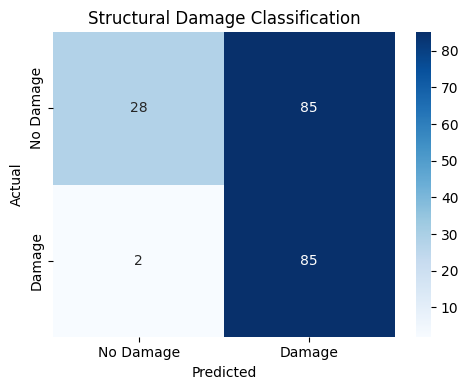

In [4]:
class ArtificialImmuneClassifier:
    def __init__(self, n_detectors=20, n_clones=5, mutation_rate=0.05, n_generations=10):
        self.n_detectors = n_detectors
        self.n_clones = n_clones
        self.mutation_rate = mutation_rate
        self.n_generations = n_generations
        self.memory_cells = []

    def _affinity(self, v1, v2):
        return -np.linalg.norm(v1 - v2)

    def fit(self, X, y):
        # Initialize memory cells with random detectors
        idxs = np.random.choice(len(X), self.n_detectors, replace=False)
        self.memory_cells = [{'vector': X[i], 'label': y[i]} for i in idxs]

        for _ in range(self.n_generations):
            new_memory = []
            for antigen, label in zip(X, y):
                bmu = max(self.memory_cells, key=lambda ab: self._affinity(ab['vector'], antigen))
                clones = [dict(bmu) for _ in range(self.n_clones)]

                for clone in clones:
                    noise = np.random.normal(0, self.mutation_rate, size=antigen.shape)
                    clone['vector'] += noise

                best_clone = max(clones, key=lambda ab: self._affinity(ab['vector'], antigen))

                # Replace if better affinity
                if self._affinity(best_clone['vector'], antigen) > self._affinity(bmu['vector'], antigen):
                    new_memory.append({'vector': best_clone['vector'], 'label': label})
                else:
                    new_memory.append(bmu)

            self.memory_cells = new_memory

    def predict(self, X):
        preds = []
        for x in X:
            bmu = max(self.memory_cells, key=lambda ab: self._affinity(ab['vector'], x))
            preds.append(bmu['label'])
        return np.array(preds)


# Step 1: Simulate structured classification data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=6,
                           n_redundant=2, n_classes=2, random_state=42)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train unified immune classifier
model = ArtificialImmuneClassifier(n_detectors=20, n_clones=10, mutation_rate=0.05, n_generations=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 4: Evaluate
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Test Accuracy: {acc * 100:.2f} %")
print("Confusion Matrix:\n", cm)

# Step 5: Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Damage', 'Damage'], yticklabels=['No Damage', 'Damage'])
plt.title('Structural Damage Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
